In [61]:
import os
import pickle
import scipy 
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.signal import get_window
import python_speech_features as mfcc
from sklearn.mixture import GaussianMixture 
from sklearn.decomposition import MiniBatchDictionaryLearning

## Feartures Extraction

In [62]:
# def extract_features(file_path):

#     x, sr = librosa.load(file_path)

#     freqs = np.fft.fftfreq(x.size)

#     def describe_freq(freqs):
#         mean = np.mean(freqs)
#         std = np.std(freqs) 
#         maxv = np.amax(freqs) 
#         minv = np.amin(freqs) 
#         median = np.median(freqs)
#         skew = scipy.stats.skew(freqs)
#         kurt = scipy.stats.kurtosis(freqs)
#         q1 = np.quantile(freqs, 0.25)
#         q3 = np.quantile(freqs, 0.75)
#         mode = scipy.stats.mode(freqs)[0][0]
#         iqr = scipy.stats.iqr(freqs)

#         return [mean, std, maxv, minv, median, skew, kurt, q1, q3, mode, iqr]

#     def rmse(x):
#         return [np.sum(x**2)]

#     def rmse2(x):
#         return [np.sqrt(np.mean(x**2))]

#     zero_crossings = [sum(librosa.zero_crossings(x, pad=False))]

#     tempo = [librosa.beat.tempo(x)[0]]

#     # mfcc=librosa.feature.mfcc(x)
#     mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=1)



#     hop_length = 512
#     oenv      = librosa.onset.onset_strength(y=x, sr=sr, hop_length=hop_length)
#     # tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
#     spec_centroid = librosa.feature.spectral_centroid(x)[0]
#     spectral_bandwidth=librosa.feature.spectral_bandwidth(x)[0]
#     spectral_contrast=librosa.feature.spectral_contrast(x)[0]
#     spectral_flatness=librosa.feature.spectral_flatness(x)[0]
#     spectral_rolloff=librosa.feature.spectral_rolloff(x)[0]

#     combined = np.hstack([describe_freq(freqs),rmse(x),rmse2(x),zero_crossings,tempo,mfcc[0],oenv,spec_centroid,spectral_bandwidth,
#                         spectral_contrast, spectral_flatness, spectral_rolloff]) 
#     return combined

# extract_features('./files/magdy/100.wav')

##### MFCC Feature

In [63]:
def calculate_delta(array):

    rows,cols = array.shape
    print(rows)
    print(cols)
    deltas = np.zeros((rows,20))
    N = 2
    for i in range(rows):
        index = []
        j = 1
        while j <= N:
            if i-j < 0:
                first =0
            else:
                first = i-j
            if i+j > rows-1:
                second = rows-1
            else:
                second = i+j 
            index.append((second,first))
            j+=1
        deltas[i] = ( array[index[0][0]]-array[index[0][1]] + (2 * (array[index[1][0]]-array[index[1][1]])) ) / 10
    return deltas

def extract_features(file_path):
    audio , sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfcc_feature = mfcc.mfcc(audio,sample_rate, 0.025, 0.01,20,nfft = 1200, appendEnergy = True)    
    mfcc_feature = preprocessing.scale(mfcc_feature)
    print(mfcc_feature)
    delta = calculate_delta(mfcc_feature)
    combined = np.hstack((mfcc_feature,delta)) 
    return combined

In [64]:
featuresMagdy = []
directory = './files/magdy/'
for audio in os.listdir('./files/magdy/'):
    audio_path = directory + audio
    featuresMagdy=np.vstack(extract_features(audio_path) )

featuresMayar = []
directory = './files/mayar/'
for audio in os.listdir('./files/mayar/'):
    audio_path = directory + audio
    featuresMayar=np.vstack(extract_features(audio_path) )

featuresMina = []
directory = './files/Mina/'
for audio in os.listdir('./files/Mina/'):
    audio_path = directory + audio
    featuresMina=np.vstack(extract_features(audio_path) )

featuresMostafa = []
directory = './files/mostafa/'
for audio in os.listdir('./files/mostafa/'):
    audio_path = directory + audio
    featuresmostafa=np.vstack(extract_features(audio_path) )

openFeatures = []
directory = './files/open/'
for audio in os.listdir('./files/open/'):
    audio_path = directory + audio
    openFeatures=np.vstack(extract_features(audio_path) )

[[-7.91992823 -0.66404255  0.57778965 ... -0.27422259  0.32637156
  -0.26516168]
 [ 0.04659459 -1.19293613  0.15763368 ... -1.52297596 -1.77926834
  -0.13066189]
 [ 0.14763796 -0.93281379  0.43245004 ... -0.01044203 -0.87744672
   0.27923887]
 ...
 [-0.29704029 -0.47026839 -0.28251217 ... -0.08028219 -0.2226013
  -0.23090943]
 [-0.32081529 -0.55214895 -0.50035371 ...  0.337615    0.60050052
   1.14368717]
 [-0.27192963 -1.12953205  0.71668418 ... -0.08777595  1.41933114
   0.11957042]]
293
20
[[-6.67364825 -0.49999698  1.27784003 ...  0.32926788  0.71142323
  -0.05300399]
 [-0.9318828  -0.6413264   0.43033865 ...  0.83710909 -1.54953062
  -0.63201934]
 [-0.70443959 -0.77129068  0.26439506 ...  0.57853023 -1.54458441
  -0.16453628]
 ...
 [-0.34373986 -0.54836766 -0.72551409 ...  1.90838242  1.56241673
  -1.77223937]
 [-0.39529294 -0.47111005 -0.73087077 ...  2.55605932  1.05280278
  -1.43919271]
 [-0.57720455 -0.48700847 -0.42136471 ...  1.88619893  0.21404162
  -1.78745783]]
293
20
[[-

In [46]:
magdy_gmm = GaussianMixture(n_components = 6, max_iter = 2000, covariance_type='diag',n_init = 3)
magdy_gmm.fit(featuresMagdy)

mayar_gmm = GaussianMixture(n_components = 6, max_iter = 2000, covariance_type='diag',n_init = 3)
mayar_gmm.fit(featuresMayar)

mina_gmm = GaussianMixture(n_components = 6, max_iter = 2000, covariance_type='diag',n_init = 3)
mina_gmm.fit(featuresMina)

mostafa_gmm = GaussianMixture(n_components = 6, max_iter = 2000, covariance_type='diag',n_init = 3)
mostafa_gmm.fit(featuresmostafa)

open_gmm = GaussianMixture(n_components = 6, max_iter = 2000, covariance_type='diag',n_init = 3)
open_gmm.fit(openFeatures)

GaussianMixture(covariance_type='diag', max_iter=2000, n_components=6, n_init=3)

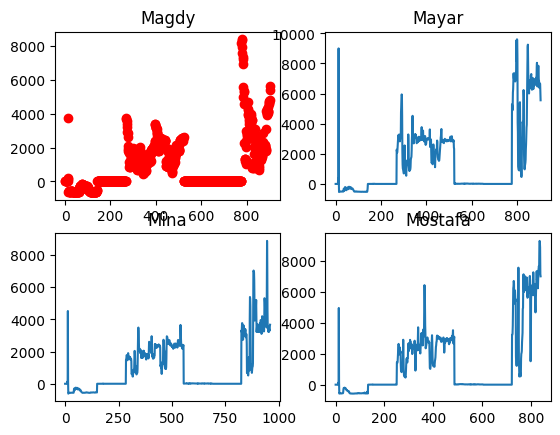

In [47]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)

# For Sine Function
axis[0, 0].plot(featuresMagdy,'ro')
axis[0, 0].set_title("Magdy")

# For Cosine Function
axis[0, 1].plot(featuresMayar)
axis[0, 1].set_title("Mayar")

# For Tangent Function
axis[1, 0].plot(featuresMina)
axis[1, 0].set_title("Mina")

# For Tanh Function
axis[1, 1].plot(featuresmostafa)
axis[1, 1].set_title("Mostafa")

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

# Combine all the operations and display
plt.show()

In [48]:
pickle.dump(mayar_gmm,open('mayar.gmm','wb'))
pickle.dump(mina_gmm,open('mina.gmm','wb'))
pickle.dump(magdy_gmm,open('magdy.gmm','wb'))
pickle.dump(mostafa_gmm,open('mostafa.gmm','wb'))
pickle.dump(open_gmm,open('open.gmm','wb'))

In [57]:
test = extract_features('./files/test/.mayar_test_2.wav')
print(test.size)

C:\Users\dell\AppData\Local\Temp\ipykernel_5076\3021499960.py:30: FutureWarning: Pass y=[0.         0.         0.         ... 0.00028889 0.00027824 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = [librosa.beat.tempo(x)[0]]
C:\Users\dell\AppData\Local\Temp\ipykernel_5076\3021499960.py:40: FutureWarning: Pass y=[0.         0.         0.         ... 0.00028889 0.00027824 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec_centroid = librosa.feature.spectral_centroid(x)[0]
C:\Users\dell\AppData\Local\Temp\ipykernel_5076\3021499960.py:41: FutureWarning: Pass y=[0.         0.         0.         ... 0.00028889 0.00027824 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth=librosa.feature.spectral_bandwidth(x)[0]
C:\Users\dell\AppData\Local\Temp\ipykernel_5076\3021499960.py:42: Future

904


In [60]:
scores_1=np.array(open_gmm.score(test))
scores_2=np.array(magdy_gmm.score(test))
scores_3=np.array(mayar_gmm.score(test))
scores_4=np.array(mina_gmm.score(test))
scores_5=np.array(mostafa_gmm.score(test))

print(scores_1)
print(scores_2)
print(scores_3)
print(scores_4)
print(scores_5)


ValueError: Expected 2D array, got 1D array instead:
array=[-7.70226138e-06  2.88675135e-01  4.99984595e-01 -5.00000000e-01
 -7.70226138e-06 -2.36030666e-16 -1.20000000e+00 -2.50003851e-01
  2.49988447e-01 -5.00000000e-01  4.99992298e-01  7.67222061e+01
  3.43783200e-02  8.97400000e+03  1.35999178e+02 -6.38217651e+02
 -6.17038513e+02 -6.09580017e+02 -6.10356140e+02 -6.09299683e+02
 -6.12137268e+02 -6.08717590e+02 -6.00774353e+02 -5.97766479e+02
 -6.00837341e+02 -6.00291931e+02 -5.98269897e+02 -6.02478821e+02
 -6.08595398e+02 -6.08032654e+02 -6.12075806e+02 -6.12190063e+02
 -6.06379761e+02 -6.07067017e+02 -6.10371521e+02 -6.09339294e+02
 -6.09814148e+02 -6.12733765e+02 -6.12076050e+02 -6.14015381e+02
 -6.15008850e+02 -6.14173950e+02 -6.13144592e+02 -6.11080505e+02
 -6.09680786e+02 -6.10381775e+02 -6.12301453e+02 -6.12203613e+02
 -6.07660583e+02 -6.06906982e+02 -6.15322327e+02 -6.16822144e+02
 -6.11503967e+02 -6.10275269e+02 -6.13010498e+02 -6.13805786e+02
 -6.11648926e+02 -6.07480652e+02 -6.07834900e+02 -6.05505127e+02
 -6.06076111e+02 -5.83796631e+02 -5.75304321e+02 -5.98394775e+02
 -6.09765198e+02 -6.09513977e+02 -6.08282959e+02 -6.05875793e+02
 -6.05201050e+02 -6.05966736e+02 -6.07935242e+02 -6.10484985e+02
 -5.94671326e+02 -4.20206390e+02 -3.40261993e+02 -3.33462097e+02
 -3.54168427e+02 -3.58593842e+02 -3.55585266e+02 -3.53594910e+02
 -3.65015289e+02 -4.24927155e+02 -5.05261444e+02 -4.07032349e+02
 -3.28752655e+02 -2.83513092e+02 -2.64802338e+02 -2.73606781e+02
 -3.14512634e+02 -3.76899963e+02 -4.04839874e+02 -4.04833252e+02
 -3.40446136e+02 -2.80586304e+02 -2.66425507e+02 -2.73243286e+02
 -2.98782257e+02 -3.38765686e+02 -3.45961273e+02 -3.46363251e+02
 -3.66158813e+02 -3.95984283e+02 -4.11607147e+02 -3.94744415e+02
 -3.63704956e+02 -3.63088379e+02 -3.90578003e+02 -4.16955566e+02
 -4.43336273e+02 -4.71338226e+02 -5.09114899e+02 -5.55194641e+02
 -5.78398254e+02 -5.85341797e+02 -5.90939697e+02 -5.95885681e+02
 -6.05257751e+02 -6.07251953e+02 -6.06612305e+02 -6.00404785e+02
 -5.82455139e+02 -5.64163818e+02 -5.59355957e+02 -5.69120850e+02
 -5.80812805e+02 -5.87905273e+02 -5.97621460e+02 -6.00871155e+02
 -6.03425476e+02 -6.06300781e+02 -6.07134827e+02 -6.07244141e+02
 -6.03404419e+02 -6.00619263e+02 -5.93631226e+02 -5.97130188e+02
 -5.96508301e+02 -5.96672974e+02 -6.02934204e+02 -6.04949585e+02
 -6.06069092e+02 -6.05617798e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.87199521e+00  9.15375650e-01  5.31229496e-01
  5.30840516e-01  3.19737375e-01  5.86702883e-01  9.15565372e-01
  7.38894820e-01  5.30751944e-01  6.42093658e-01  7.99267530e-01
  4.50736105e-01  4.01308715e-01  6.09675646e-01  3.56201679e-01
  5.31091213e-01  8.96930933e-01  4.85646516e-01  4.48559999e-01
  6.30628705e-01  5.28553724e-01  4.40519869e-01  6.25486195e-01
  4.37954068e-01  3.25295389e-01  5.03876388e-01  5.52523613e-01
  6.41960025e-01  6.04735613e-01  4.55463201e-01  3.21065754e-01
  5.19675314e-01  7.21935570e-01  5.18017530e-01  2.36741275e-01
  3.29823792e-01  8.29813242e-01  5.57147384e-01  3.65023494e-01
  3.90460610e-01  6.20008230e-01  6.75811768e-01  4.44291264e-01
  8.61734867e-01  6.40612245e-01  2.37731457e+00  1.47128642e+00
  3.99813235e-01  7.23180234e-01  4.61922169e-01  6.25367522e-01
  6.26010895e-01  7.05643177e-01  5.00392079e-01  5.84786773e-01
  4.47250009e-01  1.63652515e+00  1.54226751e+01  7.06615877e+00
  1.77979231e+00  1.45734954e+00  1.16731548e+00  1.33520508e+00
  1.88957381e+00  1.59242833e+00  2.56227851e-02  3.19162235e-02
  9.57176495e+00  7.05892467e+00  4.64096737e+00  2.95387244e+00
  1.45266867e+00  6.31266475e-01  4.23997313e-01  5.48606813e-01
  1.54135621e+00  6.23516035e+00  5.43941498e+00  2.39403462e+00
  1.29966319e+00  1.17356813e+00  1.10936475e+00  1.55029750e+00
  2.03048182e+00  1.00091124e+00  6.81982994e-01  9.30770755e-01
  2.62905455e+00  3.59108162e+00  1.99724150e+00  9.81849194e-01
  6.11652017e-01  2.68132448e-01  2.04547673e-01  1.01163030e-01
  4.98459637e-02  2.36079484e-01  4.50671405e-01  5.37924767e-01
  5.32027006e-01  3.16529840e-01  5.10484695e-01  8.52901280e-01
  1.13076150e+00  1.68141842e+00  2.16968536e+00  1.23981357e+00
  5.91042399e-01  5.47253788e-01  5.22563994e-01  4.53841656e-01
  4.73475188e-01  4.69854325e-01  5.16131759e-01  4.77270931e-01
  5.31173706e-01  7.27850795e-01  7.76614428e-01  8.87722731e-01
  5.07354915e-01  7.16058314e-01  6.42643094e-01  5.00037551e-01
  5.69655418e-01  3.18678050e+03  3.04500458e+03  3.12158608e+03
  3.15345533e+03  3.15169422e+03  3.18868276e+03  3.01394007e+03
  3.03013808e+03  3.06102308e+03  3.02506064e+03  2.99250329e+03
  3.01021399e+03  3.19148465e+03  3.36571286e+03  3.35885277e+03
  3.40528394e+03  3.41935120e+03  3.26201056e+03  3.29295054e+03
  3.29621103e+03  3.23458720e+03  3.21326635e+03  3.34591398e+03
  3.35852037e+03  3.34295603e+03  3.30661271e+03  3.30257843e+03
  3.23068646e+03  3.30233944e+03  3.29015201e+03  3.34021712e+03
  3.34258697e+03  3.20312106e+03  3.19191423e+03  3.31505313e+03
  3.49219346e+03  3.45033150e+03  3.27902230e+03  3.45187679e+03
  3.55891686e+03  3.40103997e+03  3.11884323e+03  3.01875578e+03
  3.08050627e+03  3.56869101e+03  3.72733992e+03  4.69570731e+03
  4.71774621e+03  3.96683419e+03  3.57574912e+03  3.50321619e+03
  3.26043756e+03  3.16580831e+03  3.23613474e+03  3.30497948e+03
  3.36385517e+03  3.59163430e+03  3.60992229e+03  1.68661393e+03
  1.09369293e+03  9.02830906e+02  8.95167344e+02  9.76403359e+02
  9.91160046e+02  8.58648766e+02  9.68545012e+02  1.55030358e+03
  9.95899418e+02  2.23358126e+03  2.61797730e+03  1.50034878e+03
  1.37290057e+03  1.36290943e+03  1.06162539e+03  7.02870562e+02
  5.61372766e+02  5.77188347e+02  1.21501197e+03  1.63367542e+03
  1.75447553e+03  1.67071019e+03  1.40025672e+03  1.49649431e+03
  1.50120124e+03  1.35499313e+03  1.22124055e+03  9.97633357e+02
  1.05285913e+03  1.18633210e+03  1.13970473e+03  1.04537385e+03
  1.07571983e+03  1.26753411e+03  1.52089291e+03  1.66397609e+03
  1.84907658e+03  2.32096195e+03  2.47975354e+03  2.40629126e+03
  2.64913137e+03  3.21682506e+03  3.66616490e+03  3.84156213e+03
  3.65204729e+03  3.13002084e+03  2.92605444e+03  2.64161535e+03
  2.47267542e+03  2.73415694e+03  2.85388152e+03  2.82968268e+03
  3.21613659e+03  3.38045317e+03  3.45819718e+03  3.45833987e+03
  3.38888369e+03  3.28384436e+03  3.04594562e+03  2.92790848e+03
  2.70432441e+03  2.92097514e+03  3.20012844e+03  3.21509841e+03
  3.30066312e+03  3.23893539e+03  3.14680329e+03  3.13913844e+03
  3.07637497e+03  3.03438887e+03  3.09500225e+03  3.13906877e+03
  3.18171099e+03  3.16487538e+03  3.10264918e+03  3.03623254e+03
  2.97602553e+03  2.98617309e+03  3.00467043e+03  3.00484602e+03
  3.06700856e+03  3.09224225e+03  3.07854230e+03  3.08473888e+03
  3.05167433e+03  3.01598750e+03  3.02090006e+03  3.03233271e+03
  3.04965514e+03  3.03635318e+03  3.05372593e+03  3.12471886e+03
  3.13014963e+03  3.13126092e+03  3.12652564e+03  3.12152590e+03
  3.11623558e+03  3.07835779e+03  3.12760820e+03  3.10852889e+03
  3.09380505e+03  3.17848857e+03  3.14298887e+03  3.09230016e+03
  3.05141240e+03  3.08160721e+03  3.17014002e+03  3.17473500e+03
  3.09917533e+03  3.11725694e+03  3.10184321e+03  3.05906630e+03
  2.93952670e+03  3.00255841e+03  2.90677570e+03  2.71098100e+03
  2.77823738e+03  3.17896169e+03  3.20489241e+03  3.12123773e+03
  3.08988879e+03  3.02842883e+03  3.03133239e+03  3.04324723e+03
  3.12732511e+03  3.06179820e+03  1.95648824e+03  1.48661195e+03
  1.31019101e+03  1.50547880e+03  1.74241296e+03  1.76125944e+03
  1.57090389e+03  1.81631404e+03  2.46483727e+03  1.90305871e+03
  2.48975703e+03  2.43821707e+03  1.96554671e+03  1.95268837e+03
  2.04708401e+03  1.85315905e+03  1.34000166e+03  1.08688995e+03
  1.19305033e+03  2.17622962e+03  2.45028669e+03  2.47147951e+03
  2.38611215e+03  2.22953524e+03  2.33951894e+03  2.29469683e+03
  2.17033152e+03  2.14337515e+03  1.90302357e+03  2.02919630e+03
  2.09248706e+03  1.92509371e+03  1.73450667e+03  1.64935749e+03
  1.58117506e+03  1.65283364e+03  1.95329805e+03  2.40523580e+03
  2.89199695e+03  3.11061576e+03  3.10443396e+03  3.15426024e+03
  3.23055035e+03  3.28822155e+03  3.26550801e+03  3.22970831e+03
  3.15466089e+03  3.04602783e+03  2.91734104e+03  2.86198658e+03
  2.95978155e+03  3.06911227e+03  3.16825760e+03  3.23316262e+03
  3.17629187e+03  3.17459780e+03  3.17391983e+03  3.14439769e+03
  3.10593365e+03  3.09700077e+03  3.06425320e+03  2.97129392e+03
  2.97043945e+03  3.02137998e+03  3.02500055e+03  3.06267594e+03
  3.09602430e+03  3.08293460e+03  3.05633255e+03  2.26080505e+01
  1.12179835e+01  1.68109126e+01  2.53561508e+01  1.45201824e+01
  2.17975499e+01  8.74008079e+00  9.73370362e+00  1.25202421e+01
  2.01879715e+01  2.07111606e+01  1.41706322e+01  1.01430826e+01
  2.12471438e+01  1.24843524e+01  1.17172910e+01  1.32496731e+01
  1.07728217e+01  1.08177383e+01  1.17695240e+01  2.04724539e+01
  1.76306854e+01  1.15735054e+01  8.09405755e+00  1.05033502e+01
  1.06704006e+01  9.98839897e+00  9.66944279e+00  1.53416451e+01
  1.05940806e+01  1.60989255e+01  1.23981939e+01  1.06847008e+01
  7.77077995e+00  1.60863274e+01  1.20208295e+01  7.91410239e+00
  1.10460314e+01  1.33205033e+01  1.42182095e+01  1.00699289e+01
  9.79919517e+00  1.17517863e+01  1.04423485e+01  1.05670419e+01
  1.28461027e+01  1.37376121e+01  8.20585836e+00  7.36497688e+00
  1.33764120e+01  1.06242106e+01  1.45269982e+01  1.59458130e+01
  1.02934702e+01  1.09205956e+01  1.09759819e+01  2.27467320e+01
  1.77374906e+01  1.35827645e+01  1.60661385e+01  1.87468303e+01
  1.14381152e+01  1.09444654e+01  6.11804670e+00  1.84197968e+01
  1.63316217e+01  1.91748402e+01  1.52027536e+01  1.46514623e+01
  1.23869262e+01  1.74876148e+01  1.92352910e+01  2.24236686e+01
  1.71746377e+01  1.38184184e+01  2.01003961e+01  1.46883208e+01
  1.37214814e+01  1.52622322e+01  1.30808597e+01  2.51800576e+01
  2.39920739e+01  2.51259056e+01  2.22035682e+01  2.22867490e+01
  1.58560492e+01  2.01290619e+01  2.11973718e+01  2.01193762e+01
  2.21604748e+01  2.26909224e+01  2.17672343e+01  2.07948669e+01
  1.92105364e+01  2.75577368e+01  1.66428719e+01  2.40974639e+01
  1.36823891e+01  1.39773896e+01  2.19512817e+01  2.93430250e+01
  8.23127254e+00  1.03393053e+01  9.85777821e+00  1.21368833e+01
  1.36096311e+01  1.77572874e+01  1.95916722e+01  1.33319126e+01
  2.74113845e+01  1.83212561e+01  1.84852494e+01  9.13705265e+00
  9.29575220e+00  5.46259531e+00  9.17938801e+00  1.24973948e+01
  1.59935202e+01  1.37950766e+01  1.14125448e+01  9.93026402e+00
  1.08616272e+01  9.74000100e+00  1.22287879e+01  8.77700789e+00
  1.29231137e+01  1.20943953e+01  1.01379685e-01  8.92972723e-02
  7.94835016e-02  6.86848164e-02  6.36282116e-02  6.95073158e-02
  5.54099120e-02  6.02310523e-02  7.87150413e-02  6.67782873e-02
  5.94613366e-02  7.16957301e-02  8.36447105e-02  1.08729005e-01
  1.11300401e-01  1.14094853e-01  1.33072764e-01  1.10586204e-01
  1.12470202e-01  1.11045167e-01  8.35308060e-02  8.66457671e-02
  1.20378479e-01  1.09335355e-01  9.43377987e-02  9.25245732e-02
  1.02519050e-01  9.70266536e-02  1.03049509e-01  1.00233421e-01
  1.03431746e-01  1.12709038e-01  8.42139795e-02  7.84398466e-02
  1.00773357e-01  1.21458285e-01  1.30071387e-01  1.00418963e-01
  1.03191122e-01  1.08279094e-01  9.77379829e-02  6.41153008e-02
  5.77422492e-02  6.74846545e-02  1.17969036e-01  1.43421799e-01
  1.49701312e-01  1.18246518e-01  1.24294907e-01  1.15153894e-01
  1.08746767e-01  9.00053829e-02  7.64272809e-02  9.06735882e-02
  1.05383493e-01  1.17974520e-01  1.32430032e-01  1.39474422e-01
  3.07483133e-03  3.38474696e-04  9.13636832e-05  4.61255477e-05
  4.45689293e-05  5.36838088e-05  7.01442259e-05  2.99253908e-04
  1.71368860e-03  3.03341396e-04  8.53952765e-03  2.31220946e-02
  1.60033896e-03  4.58648545e-04  2.86645140e-04  1.38522591e-04
  2.52505797e-05  1.07192864e-05  2.14811789e-05  4.35278693e-04
  1.22176204e-03  9.79981152e-04  8.45273142e-04  6.69667381e-04
  9.83256730e-04  6.78073557e-04  3.00440297e-04  1.31254943e-04
  7.52512860e-05  9.62915219e-05  2.11108330e-04  2.62249378e-04
  2.85570190e-04  3.11960699e-04  5.57243999e-04  2.10992247e-03
  4.30017710e-03  7.23271165e-03  1.32536208e-02  8.28614086e-03
  5.38240746e-03  1.05988579e-02  4.64597568e-02  1.03821240e-01
  1.28118932e-01  1.17400542e-01  6.23826683e-02  5.61364368e-02
  2.48436015e-02  1.17146745e-02  1.96907464e-02  3.20273004e-02
  2.74762064e-02  5.84354363e-02  1.07823417e-01  1.10424399e-01
  1.05645649e-01  9.78048146e-02  8.31896439e-02  4.97951284e-02
  3.87617238e-02  3.38018648e-02  5.93448021e-02  9.83980149e-02
  1.00360356e-01  1.07940204e-01  9.57397670e-02  6.61565438e-02
  7.98979104e-02  7.62275391e+03  7.20285645e+03  7.47202148e+03
  7.49355469e+03  7.68735352e+03  7.68735352e+03  7.36435547e+03
  7.19208984e+03  6.99829102e+03  7.03059082e+03  7.13825684e+03
  7.05212402e+03  7.34282227e+03  7.51508789e+03  7.39665527e+03
  7.48278809e+03  7.53662109e+03  7.28898926e+03  7.23515625e+03
  7.28898926e+03  7.36435547e+03  7.19208984e+03  7.35358887e+03
  7.56892090e+03  7.60122070e+03  7.61198730e+03  7.68735352e+03
  7.57968750e+03  7.59045410e+03  7.38588867e+03  7.56892090e+03
  7.52585449e+03  7.34282227e+03  7.61198730e+03  7.64428711e+03
  7.71965332e+03  7.62275391e+03  7.43972168e+03  7.76271973e+03
  7.91345215e+03  7.59045410e+03  7.42895508e+03  7.33205566e+03
  7.10595703e+03  7.13825684e+03  7.55815430e+03  8.61328125e+03
  8.47331543e+03  7.55815430e+03  8.08571777e+03  8.10725098e+03
  7.53662109e+03  7.43972168e+03  7.43972168e+03  7.43972168e+03
  7.63352051e+03  7.95651855e+03  7.75195312e+03  4.02670898e+03
  1.47502441e+03  1.11972656e+03  9.68994141e+02  9.68994141e+02
  9.68994141e+02  9.58227539e+02  9.90527344e+02  3.52067871e+03
  9.79760742e+02  5.08183594e+03  5.15720215e+03  3.30534668e+03
  3.22998047e+03  3.20844727e+03  1.73342285e+03  9.25927734e+02
  4.84497070e+02  4.73730469e+02  2.03488770e+03  3.18691406e+03
  3.22998047e+03  3.17614746e+03  2.05642090e+03  4.47890625e+03
  4.37124023e+03  1.79802246e+03  1.43195801e+03  1.04436035e+03
  1.03359375e+03  1.25969238e+03  1.43195801e+03  1.53962402e+03
  1.73342285e+03  1.95952148e+03  2.22868652e+03  2.51938477e+03
  3.53144531e+03  5.92163086e+03  6.89062500e+03  6.84755859e+03
  7.15979004e+03  7.97805176e+03  8.43024902e+03  8.51638184e+03
  8.24721680e+03  7.62275391e+03  7.13825684e+03  6.49226074e+03
  5.87856445e+03  6.47072754e+03  6.99829102e+03  7.42895508e+03
  7.95651855e+03  7.82731934e+03  7.76271973e+03  7.68735352e+03
  7.73041992e+03  7.52585449e+03  7.19208984e+03  6.99829102e+03
  6.61069336e+03  6.81525879e+03  7.18132324e+03  7.17055664e+03
  7.38588867e+03  7.33205566e+03  7.27822266e+03  7.22438965e+03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.